### Spectral Clustering
<a href="https://www.analyticsvidhya.com/blog/2021/05/what-why-and-how-of-spectral-clustering/"> blog </a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import SpectralClustering
# from sklearn.datasets.samples_generator import make_blobs
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from numpy import random

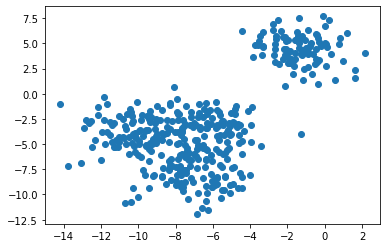

In [2]:
random.seed(1)
x, _ = make_blobs(n_samples=400, centers=4, cluster_std=1.5)
plt.scatter(x[:,0], x[:,1])
plt.show()

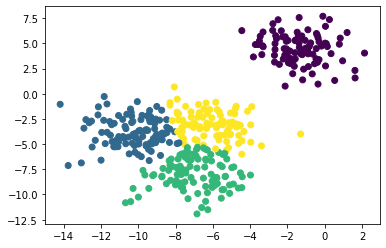

SpectralClustering(n_clusters=4)


In [3]:
sc=SpectralClustering(n_clusters=4).fit(x)
# SpectralClustering(affinity='rbf', assign_labels='kmeans', coef0=1, degree=3,
#                    eigen_solver=None, eigen_tol=0.0, gamma=1.0,
#                    kernel_params=None, n_clusters=4, n_components=None,
#                    n_init=10, n_jobs=None, n_neighbors=10, random_state=None)
labels = sc.labels_
plt.scatter(x[:,0], x[:,1], c=labels)
plt.show()
print(sc)

### Changing the number of clusters

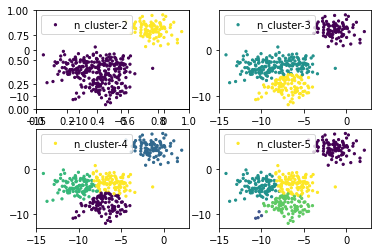

In [4]:
f = plt.figure()
f.add_subplot(2, 2, 1)
for i in range(2, 6):
    sc = SpectralClustering(n_clusters=i).fit(x)
    f.add_subplot(2, 2, i-1)
    plt.scatter(x[:,0], x[:,1], s=5, c=sc.labels_, label="n_cluster-"+str(i))
    plt.legend()
plt.show()

There are two major approaches in clustering. They are:

- Compactness
- Connectivity

In compactness, the points are closer to each other and are compact towards the cluster center. Distance is used as a measure to compute closeness. There are different types of distance metrics that are in use. A few of them are Euclidean distance, Manhattan distance, Minkowski distance, and Hamming distance. K-means algorithm uses the compactness approach. In connectivity, the points in a cluster are either immediately next to each other (epsilon distance) or connected. Even if the distance is less, they are not put in the same cluster. Spectral clustering is one of the techniques to follow this approach.

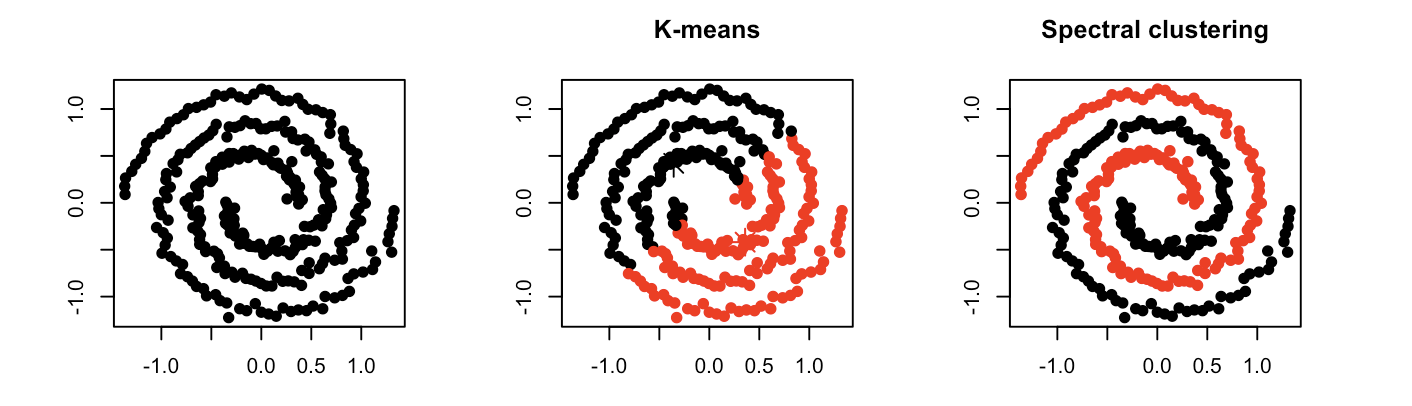

#### How to do Spectral Clustering?
The three major steps involved in spectral clustering are: constructing a similarity graph, projecting data onto a lower-dimensional space, and clustering the data. Given a set of points S in a higher-dimensional space, it can be elaborated as follows:

1. Form a distance matrix
2. Transform the distance matrix into an affinity matrix A
3. Compute the degree matrix D and the Laplacian matrix L = D – A.
4. Find the eigenvalues and eigenvectors of L.
5. With the eigenvectors of k largest eigenvalues computed from the previous step form a matrix.
6. Normalize the vectors.
7. Cluster the data points in k-dimensional space